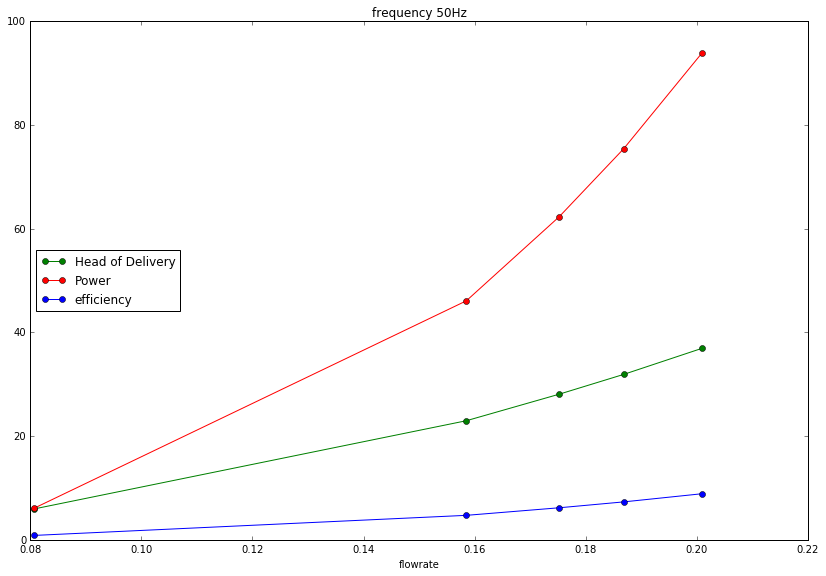

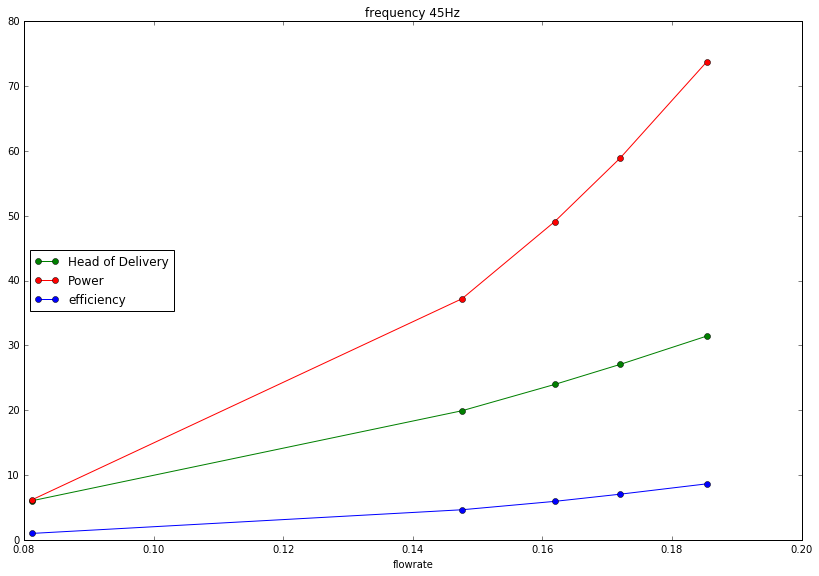

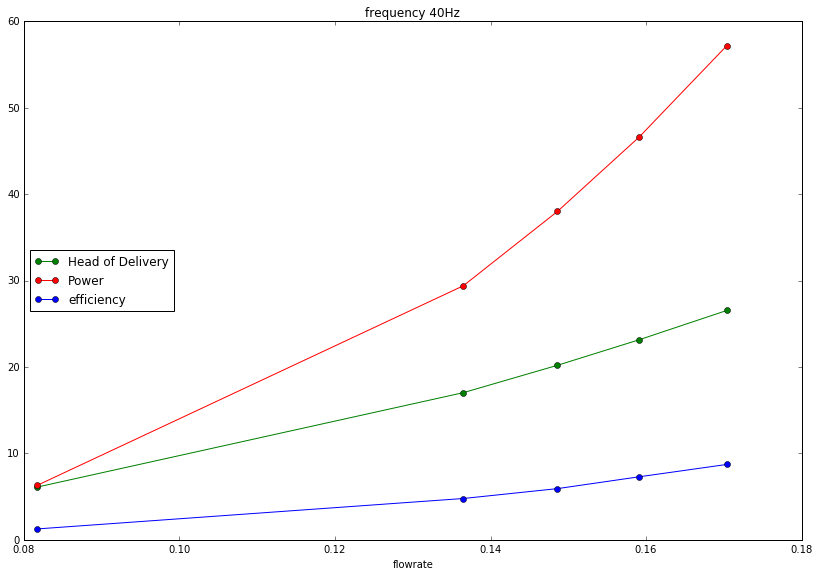

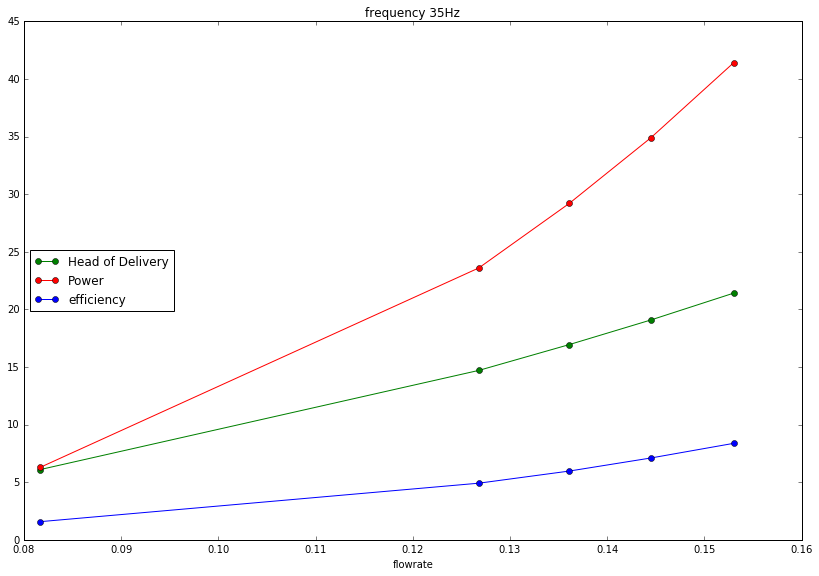

In [4]:
#将实验所得风机性能参数原始数据，经过处理后，使用matplotlib进行作图，得到各频率下的风机性能曲线图。
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import math
import xlrd
from prettytable import PrettyTable

def getData(filename):
    excel = xlrd.open_workbook(filename)
    sheet = excel.sheets()[0]     #获取第一个sheet
    ncols = sheet.ncols #列数
    nrows = sheet.nrows #行数
    qv = 0
    H = 0
    P = 0
    n = 0
    xygroups=[]
    xy={'qv':[],'H':[],'P':[],'n':[]}

    for j in range(1,nrows):
        qv = sheet.cell_value(j, 0)
        H = sheet.cell_value(j, 1)
        P = sheet.cell_value(j, 2)
        n = sheet.cell_value(j, 3)
        xy['qv'].append(float(qv))
        xy['H'].append(float(H))
        xy['P'].append(float(P))
        xy['n'].append(float(n))


    xygroups.append(xy)
    xy={'qv':[],'H':[],'P':[],'n':[]}
    return xygroups

def plot(xygroups):
    figcount=len(xygroups)
    figcol=4
    figrow=math.ceil(figcount/figcol)
    fig=plt.figure(figsize=(12.0,8.0))
    fig.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95)

    for i in range(0,len(xygroups)):
        line1=plt.plot(xygroups[i]['qv'],xygroups[i]['H'], '-og')
        line2=plt.plot(xygroups[i]['qv'],xygroups[i]['P'], '-or')
        line3=plt.plot(xygroups[i]['qv'],xygroups[i]['n'], '-ob')
        plt.xlabel('flowrate')
        plt.ylabel('')
        plt.legend((line1[0], line2[0],line3[0]), ('Head of Delivery', 'Power' , 'efficiency') , loc='center left')

def drawplot(filename, frequency):
    xygroups = []
    xygroups = getData(filename)
    plot(xygroups)
    plt.title('frequency '+str(frequency)+'Hz')
    plt.show()
%matplotlib inline

if __name__=='__main__':
    drawplot('fan50.xlsx',50)
    drawplot('fan45.xlsx',45)
    drawplot('fan40.xlsx',40)
    drawplot('fan35.xlsx',35)